In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

from stochastic_simulation.models.ornstien_uhlenbeck import OrnsteinUhlenbeck
from stochastic_simulation.wiener import generate

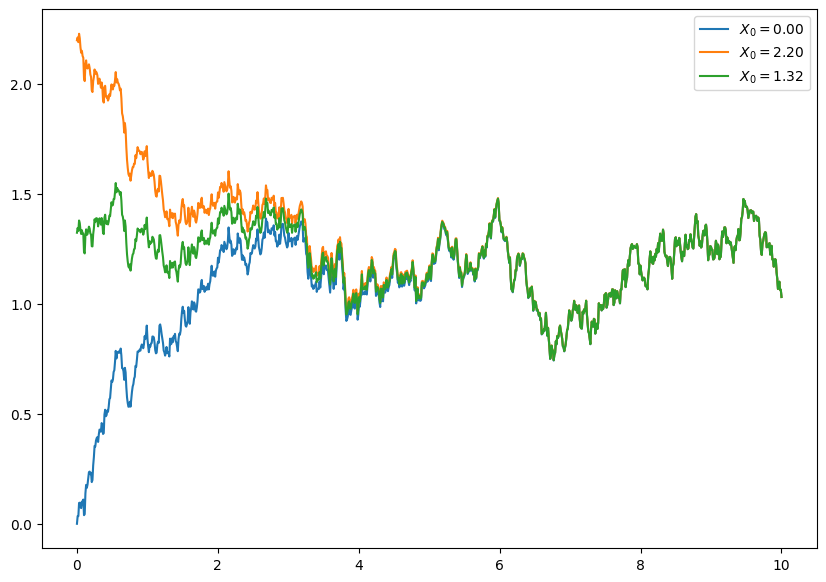

In [8]:
theta, mu, sigma = 1, 1.2, 0.3
T = 10

initials = (0, 2.2, sps.norm(mu, sigma / (2 * theta)**0.5).rvs())

fig, ax = plt.subplots(figsize=(10, 7))

ts, ws = generate(end_t=T, number_of_points=1000)

for x_0 in initials:
    orn = OrnsteinUhlenbeck(x_0, theta, mu, sigma)
    _, xt = orn.generate(end_t=T, wieners=ws)
    ax.plot(ts, xt, label=r'$X_0 = $' + f'{x_0:.2f}')

ax.legend()

In [3]:
from stochastic_simulation.models.base_model import BaseModelDifferentiableTwice
from stochastic_simulation.approximation import approximate

class Stationary(BaseModelDifferentiableTwice):
    def __init__(self):
        super().__init__(x_0=0.5)
        
    def rate(self, t, xt):
        return 0.5 - xt
    
    def sigma(self, t, xt):
        return xt * (1 - xt)
    
    def rate_x(self, t, xt):
        return -1
    
    def rate_xx(self, t, xt):
        return 0
    
    def sigma_x(self, t, xt):
        return 1 - 2 * xt
    
    def sigma_xx(self, t, xt):
        return -2
    
    
"""
class Stationary(BaseModelDifferentiableTwice):
    def __init__(self, sigma=0.01):
        super().__init__(x_0=0.5)
        self.sig = sigma
        
    def rate(self, t, xt):
        return 0.5 - xt
    
    def rate_x(self, t, xt):
        return -1
    
    def rate_xx(self, t, xt):
        return 0
    
    def sigma(self, t, xt):
        return np.exp(-xt**2 / self.sig)
    
    def sigma_x(self, t, xt):
        return -2 * xt / self.sig * self.sigma(t, xt)
    
    def sigma_xx(self, t, xt):
        return -2 * (self.sig - 2 * xt**2) / self.sig * self.sigma(t, xt)
"""

'\nclass Stationary(BaseModelDifferentiableTwice):\n    def __init__(self, sigma=0.01):\n        super().__init__(x_0=0.5)\n        self.sig = sigma\n        \n    def rate(self, t, xt):\n        return 0.5 - xt\n    \n    def rate_x(self, t, xt):\n        return -1\n    \n    def rate_xx(self, t, xt):\n        return 0\n    \n    def sigma(self, t, xt):\n        return np.exp(-xt**2 / self.sig)\n    \n    def sigma_x(self, t, xt):\n        return -2 * xt / self.sig * self.sigma(t, xt)\n    \n    def sigma_xx(self, t, xt):\n        return -2 * (self.sig - 2 * xt**2) / self.sig * self.sigma(t, xt)\n'

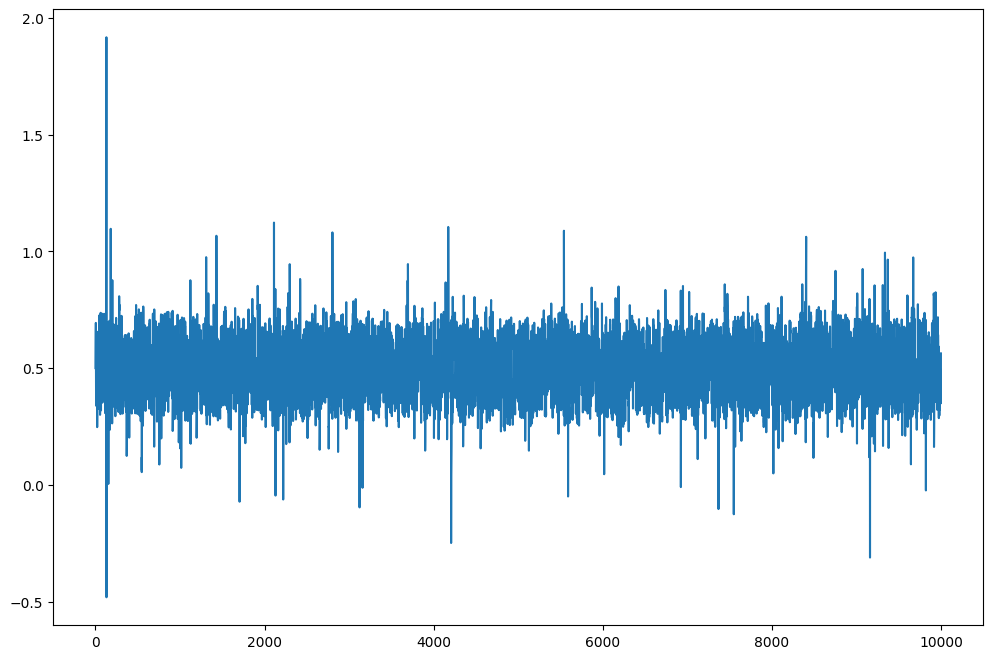

In [4]:
#st = Stationary(sigma=0.05)
st = Stationary()
ts, xt = approximate(st, end_t=10000, number_of_points=10000, method="milstein2")

plt.figure(figsize=(12, 8))
plt.plot(ts, xt)

In [14]:
sample = sps.multivariate_normal(mean=(0, 0), cov=((1, 0), (0, 1))).rvs(1000)

In [15]:
np.cov(sample, rowvar=False)

array([[0.99977296, 0.01505991],
       [0.01505991, 0.98876627]])